In [1]:
from tyssue import Sheet, SheetGeometry as geom
from tyssue import Monolayer, config
import numpy as np
from tyssue.io import hdf5
import matplotlib.pyplot as plt

In [2]:
ls ../data/hf5/

before_apoptosis_anchors.hf5  organo.hf5           small_organo.hf5
before_apoptosis.hf5          small_ellipsoid.hf5
fullerene.hf5                 small_hexagonal.hf5


In [3]:
dsets = hdf5.load_datasets('../data/hf5/small_ellipsoid.hf5',
                           data_names=['vert', 'edge', 'face', 'cell'])

In [4]:
mono = Monolayer('mono', dsets, config.geometry.bulk_spec())


In [5]:
ellipsoid_sheet = mono.get_sub_sheet('apical')

In [6]:
ellipsoid_sheet.update_specs(config.geometry.spherical_sheet())

In [7]:
ellipsoid_sheet.settings

{'geometry': 'spherical', 'height_axis': 'z'}

In [8]:
from tyssue.draw.plt_draw import quick_edge_draw
%matplotlib inline

(<matplotlib.figure.Figure at 0x7f9e5c3892b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e5c112cc0>)

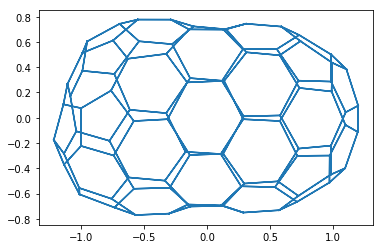

In [9]:
quick_edge_draw(ellipsoid_sheet, coords=list('zx'))

In [10]:
sheet = ellipsoid_sheet

In [11]:
np.linalg.norm(sheet.vert_df[sheet.coords], axis=1)

array([ 0.98525905,  0.95091663,  1.0560737 ,  0.82761505,  0.79039579,
        0.84544249,  0.97522915,  0.76386801,  0.76444032,  0.80598355,
        0.77405065,  0.93118136,  0.99534597,  0.92026117,  0.80669948,
        1.0165839 ,  1.02469339,  0.77592019,  0.79082013,  0.91151359,
        0.77002298,  0.99225341,  0.93065748,  0.80503911,  0.95972953,
        0.75082585,  0.78503303,  0.90927777,  0.75909461,  1.01160437,
        0.93553278,  0.80701682,  1.02025434,  0.75543099,  0.81554574,
        0.95407638,  0.75961017,  1.01242806,  0.92803539,  0.80395301,
        1.05824289,  0.77222588,  0.82590684,  0.96711238,  0.7655366 ,
        0.98925815,  0.91452924,  0.80053619,  1.03062832,  0.76874435,
        0.80189788,  0.92172471,  0.76363543,  0.98769585,  0.9295601 ,
        0.80285111,  0.96768444,  0.75002587,  0.77490449,  0.89648734,
        0.75865227,  1.01560801,  0.93951949,  0.80980232,  1.15085069,
        1.10970356,  1.1389728 ,  1.10739368,  1.09934532,  1.12

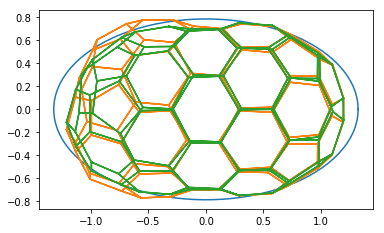

In [67]:
def to_spherical(sheet):
    
    sheet.vert_df['r'] = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    sheet.vert_df['theta'] = sheet.vert_df.eval('arccos(z/r)')
    sheet.vert_df['phi'] = np.arctan2(sheet.vert_df['y'],
                                      sheet.vert_df['x'])

def fit_ellipsoid(sheet):
    
    rho = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    theta = np.arccos(sheet.vert_df['z']/rho)
    u = rho * np.cos(theta)
    v = rho * np.sin(theta)
    poly = np.polyfit(u**2, v**2, deg=1)

    b = np.sqrt(poly[1])
    a = np.sqrt(-poly[1]/poly[0])
    return a, b

to_spherical(sheet)

a, b = fit_ellipsoid(ellipsoid_sheet)

fig, ax = plt.subplots()
theta = np.linspace(0, 2*np.pi, 100)

ax.plot(a * np.cos(theta), b * np.sin(theta))

fig, ax = quick_edge_draw(sheet, list('zx'), ax=ax)
fig, ax = quick_edge_draw(sheet, list('zy'), ax=ax)



In [26]:
a, b

(1.3233116827110747, 0.78595796955415553)

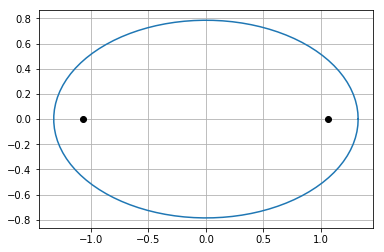

In [44]:
fig, ax = plt.subplots()
ax.plot(a * np.cos(theta),
        b * np.sin(theta))
ax.plot([np.sqrt(a**2 - b**2)], [0], 'ko')
ax.plot([-np.sqrt(a**2 - b**2)], [0], 'ko')

ax.grid()


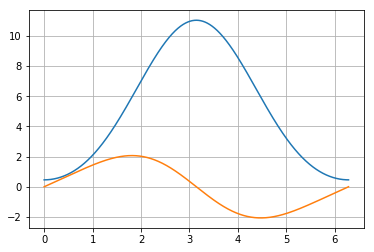

In [57]:
x0, y0 = 2, 0.
theta = np.linspace(0, 2*np.pi, 1000)

fig, ax = plt.subplots()
sq_dist = (x0 - a * np.cos(theta))**2 + (y0 - b * np.sin(theta))**2

dif_sq_dist = (b - a) * np.sin(2*theta)/2 - y0*np.cos(theta) + x0 * np.sin(theta)

ax.plot(theta, sq_dist)
ax.plot(theta, dif_sq_dist)

#ax.set_xlim(0.8, 1.)
#ax.set_ylim(-0.01, 0.1)
ax.grid()

### Pseudo ellipsis (i.e rod)

In [77]:
from scipy.optimize import leastsq

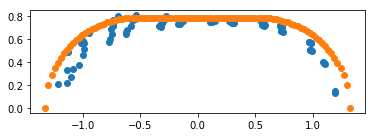

In [98]:
R = b
z0 = (a - b)
fig, ax = plt.subplots()
sheet.vert_df['rho'] = np.linalg.norm(sheet.vert_df[['x', 'y']], axis=1)
ax.plot(*sheet.vert_df[['z', 'rho']].values.T, 'o')

z = np.linspace(-a, a, 100)
r = sheet.vert_df.rho.values
l_mask = z < -z0
r_mask = z > z0
c_mask = np.abs(z) < z0

fit_r = np.zeros_like(z)
fit_r[l_mask] = np.abs(tip_r2(z[l_mask], -z0, R))**0.5
fit_r[r_mask] = np.abs(tip_r2(z[r_mask], z0, R))**0.5

fit_r[c_mask] = R

ax.plot(z, fit_r, 'o')
ax.set_aspect('equal')

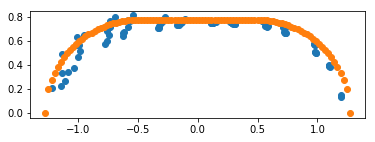

In [112]:
ap = np.percentile(np.abs(z), 95)
bp = np.percentile(r, 95)

R = bp
z0 = (ap - bp)
fig, ax = plt.subplots()
sheet.vert_df['rho'] = np.linalg.norm(sheet.vert_df[['x', 'y']], axis=1)
ax.plot(*sheet.vert_df[['z', 'rho']].values.T, 'o')

z = np.linspace(-ap, ap, 100)
r = sheet.vert_df.rho.values
l_mask = z < -z0
r_mask = z > z0
c_mask = np.abs(z) < z0

fit_r = np.zeros_like(z)
fit_r[l_mask] = np.abs(tip_r2(z[l_mask], -z0, R))**0.5
fit_r[r_mask] = np.abs(tip_r2(z[r_mask], z0, R))**0.5

fit_r[c_mask] = R

ax.plot(z, fit_r, 'o')
ax.set_aspect('equal')

In [117]:
def update_height(sheet, height_axis='z'):
    
    x, y = set(sheet.coords).difference(height_axis)
    z = height_axis
    sheet.vert_df['rho'] = np.linalg.norm(sheet.vert_df[[x, y]],
                                          axis=1)
    b = np.percentile(r, 95)
    a = np.percentile(np.abs(sheet.vert_df[z]), 95)
    R = b
    z0 = (a - b)
    
    l_mask = sheet.vert_df[sheet.vert_df[z] < -z0].index
    r_mask = sheet.vert_df[sheet.vert_df[z] > z0].index
    
    sheet.vert_df.loc['rho', l_mask] = dist_to_point(sheet.vert_df.loc[l_mask],
                                                     [0, 0, -z0],
                                                     [x, y, z])
    sheet.vert_df.loc['rho', r_mask] = dist_to_point(sheet.vert_df.loc[r_mask],
                                                     [0, 0, z0],
                                                     [x, y, z])

    

def dist_to_point(vert_df, point, coords):
    
    return sum(((vert_df[c] - u)**2 for 
                c, u in zip(coords, point)))**0.5
    